<a href="https://colab.research.google.com/github/bikash-bhoi/eva4/blob/master/Session8/Session_8_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!rm -rf eva4

In [2]:
!git clone https://github.com/bikash-bhoi/eva4.git
!cp /content/eva4/Session8/*.py .

Cloning into 'eva4'...
remote: Enumerating objects: 204, done.
remote: Counting objects: 100% (204/204), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 204 (delta 111), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (204/204), 1.02 MiB | 2.99 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [3]:
!pip install torchsummary

In [0]:
from download_load import download_load
from display_imgs import display_imgs
from net import ResNet18, disp_summary
from train_test import train , test
import torchsummary
from torchsummary import summary

In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import OneCycleLR
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import torchvision
import torchsummary
from torchsummary import summary
import torch

In [6]:
trainset, testset, train_loader, test_loader, classes =download_load()

CUDA Available? True



Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


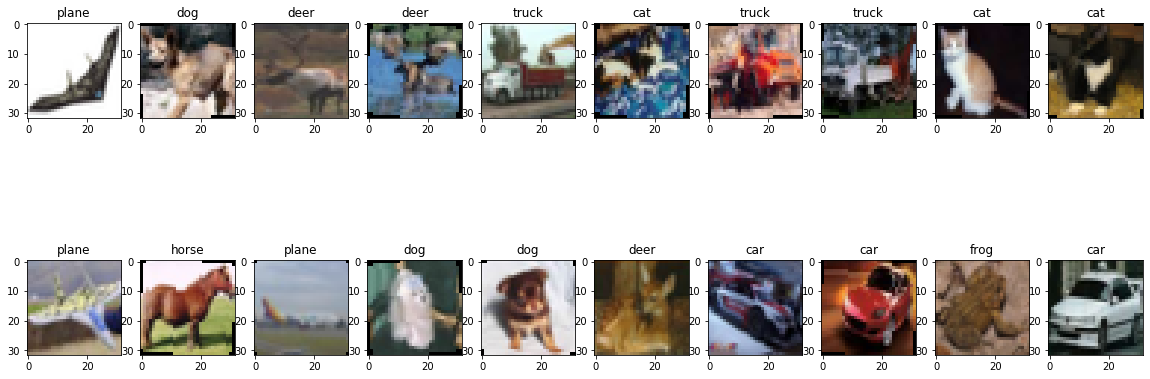

In [7]:
display_imgs(train_loader, classes)

In [0]:
use_cuda= torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')
net = ResNet18()
model=net.to(device)

In [9]:
summary(model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

/content/net.py:98: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


In [10]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
#model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = OneCycleLR(optimizer,max_lr=0.4,total_steps=40)

for epoch in range(1, 21):
    print(f'Epoch: {epoch} Learning_Rate {scheduler.get_lr()}')
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 1 Learning_Rate [0.016000000000000014]


/content/net.py:98: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=1.8777096271514893 Batch_id=781 Accuracy=36.87: 100%|██████████| 782/782 [00:59<00:00, 13.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.4249, Accuracy: 4727/10000 (47.27%)

Epoch: 2 Learning_Rate [0.023777349066016473]


Loss=1.5437041521072388 Batch_id=781 Accuracy=51.91: 100%|██████████| 782/782 [00:59<00:00, 13.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2020, Accuracy: 5735/10000 (57.35%)

Epoch: 3 Learning_Rate [0.04647932169641322]


Loss=1.1342461109161377 Batch_id=781 Accuracy=59.40: 100%|██████████| 782/782 [01:00<00:00, 12.99it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0047, Accuracy: 6517/10000 (65.17%)

Epoch: 4 Learning_Rate [0.08226673908250526]


Loss=0.6619880199432373 Batch_id=781 Accuracy=64.52: 100%|██████████| 782/782 [01:00<00:00, 12.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8949, Accuracy: 6898/10000 (68.98%)

Epoch: 5 Learning_Rate [0.1282403175036378]


Loss=1.0137289762496948 Batch_id=781 Accuracy=69.38: 100%|██████████| 782/782 [01:00<00:00, 12.91it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8726, Accuracy: 7000/10000 (70.00%)

Epoch: 6 Learning_Rate [0.18067555105152924]


Loss=0.5786545872688293 Batch_id=781 Accuracy=73.24: 100%|██████████| 782/782 [01:01<00:00, 12.80it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7643, Accuracy: 7451/10000 (74.51%)

Epoch: 7 Learning_Rate [0.23532444894847074]


Loss=0.9567198753356934 Batch_id=781 Accuracy=76.20: 100%|██████████| 782/782 [01:00<00:00, 12.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6563, Accuracy: 7783/10000 (77.83%)

Epoch: 8 Learning_Rate [0.2877596824963622]


Loss=0.9419330358505249 Batch_id=781 Accuracy=78.93: 100%|██████████| 782/782 [01:01<00:00, 12.68it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6528, Accuracy: 7850/10000 (78.50%)

Epoch: 9 Learning_Rate [0.3337332609174947]


Loss=0.6761011481285095 Batch_id=781 Accuracy=80.43: 100%|██████████| 782/782 [01:01<00:00, 12.73it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6212, Accuracy: 7887/10000 (78.87%)

Epoch: 10 Learning_Rate [0.3695206783035868]


Loss=0.2856447994709015 Batch_id=781 Accuracy=82.06: 100%|██████████| 782/782 [01:01<00:00, 12.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5635, Accuracy: 8094/10000 (80.94%)

Epoch: 11 Learning_Rate [0.3922226509339835]


Loss=0.1272178292274475 Batch_id=781 Accuracy=83.63: 100%|██████████| 782/782 [01:00<00:00, 12.82it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5625, Accuracy: 8129/10000 (81.29%)

Epoch: 12 Learning_Rate [0.4]


Loss=0.5781495571136475 Batch_id=781 Accuracy=85.12: 100%|██████████| 782/782 [01:00<00:00, 12.91it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5400, Accuracy: 8227/10000 (82.27%)

Epoch: 13 Learning_Rate [0.3987424470088807]


Loss=0.24376332759857178 Batch_id=781 Accuracy=85.81: 100%|██████████| 782/782 [01:01<00:00, 12.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5095, Accuracy: 8313/10000 (83.13%)

Epoch: 14 Learning_Rate [0.39498560249403497]


Loss=0.9698079824447632 Batch_id=781 Accuracy=87.05: 100%|██████████| 782/782 [01:00<00:00, 12.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4717, Accuracy: 8396/10000 (83.96%)

Epoch: 15 Learning_Rate [0.38877671095500926]


Loss=0.31961601972579956 Batch_id=781 Accuracy=88.13: 100%|██████████| 782/782 [01:00<00:00, 12.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5061, Accuracy: 8393/10000 (83.93%)

Epoch: 16 Learning_Rate [0.38019385280538953]


Loss=0.38676920533180237 Batch_id=781 Accuracy=88.92: 100%|██████████| 782/782 [01:00<00:00, 12.86it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4652, Accuracy: 8442/10000 (84.42%)

Epoch: 17 Learning_Rate [0.36934496246629744]


Loss=0.6164101362228394 Batch_id=781 Accuracy=89.68: 100%|██████████| 782/782 [01:01<00:00, 12.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4901, Accuracy: 8495/10000 (84.95%)

Epoch: 18 Learning_Rate [0.35636647102842]


Loss=0.10866668820381165 Batch_id=781 Accuracy=90.42: 100%|██████████| 782/782 [01:01<00:00, 12.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4560, Accuracy: 8499/10000 (84.99%)

Epoch: 19 Learning_Rate [0.34142159055188454]


Loss=0.13258232176303864 Batch_id=781 Accuracy=91.16: 100%|██████████| 782/782 [01:00<00:00, 12.95it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4294, Accuracy: 8651/10000 (86.51%)

Epoch: 20 Learning_Rate [0.3246982615799052]


Loss=0.17892639338970184 Batch_id=781 Accuracy=92.14: 100%|██████████| 782/782 [01:00<00:00, 13.02it/s]



Test set: Average loss: 0.4878, Accuracy: 8553/10000 (85.53%)

